# Around Simpson's Paradox

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data are available in the MOOC repository. The CSV file contains data for the 1314 women that were polled in Whickham, England, in 1972-1974 and were categorized as "currently smoking" or "never smoked". Each line is related to a person and contains whether she smokes or not, whether alive or dead twenty year after the survey and her age at the time of the survey.

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"
data = pd.read_csv(data_url)
print("Number of rows:", len(data))
data.head()

Number of rows: 1314


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

The CSV file does not contain any missing data.

In [3]:
print("Number of rows with missing values:", data.isnull().any(axis=1).sum())

Number of rows with missing values: 0


Let's visualize the number of women alive and dead after twenty years, according to their smoking habits. A heatmap is effective in this case.

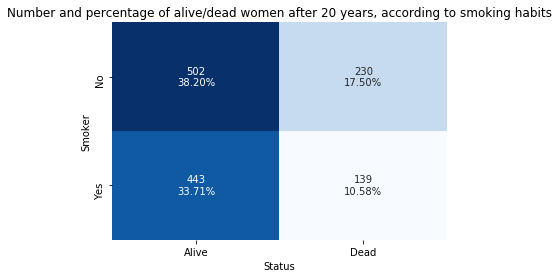

In [71]:
count = np.array(data.groupby(['Smoker', 'Status']).count())
count = np.reshape(count, (2, 2))
annots = np.array([f"{v}\n{v/len(data):.2%}" for v in count.flatten()]).reshape(2,2)

sns.heatmap(count, annot=annots, fmt="", cmap='Blues', cbar=False,
           xticklabels=['Alive', 'Dead'], yticklabels=['No', 'Yes'])
plt.title("Number and percentage of alive/dead women after 20 years, according to smoking habits")
plt.xlabel("Status")
plt.ylabel("Smoker")
plt.show()